# Chapter-5: Support Vector Machines (SVM)

In [61]:
import sys
import sklearn
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib as mlp
%matplotlib inline
import seaborn as sns
import pandas as pd

## Zuerst import İris Dataset

In [62]:
from sklearn.svm import SVC
from sklearn import datasets
from sklearn import svm
import pandas as pd

iris = datasets.load_iris() # I can't work with data 
data = pd.read_csv('Iris.csv')

In [63]:
X = iris['data'][:, (2,3)] # Petal Length and Petal Width
y = iris['target']

In [64]:
setosa_or_versicolor = (y == 0)|(y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [65]:
X.info()

AttributeError: 'numpy.ndarray' object has no attribute 'info'

In [66]:
iris.info()


AttributeError: info

In [67]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [68]:
# we create instance of SVM and fit out data. We don't scale our
# data since we want to plot the support vectors.

C = 1.0

svm.SVC(kernel = 'linear', C = C),
svm.LinearSVC(C = C, max_iter = 10000),
svm.SVC(kernel = 'rbf', gamma = 0.7, C = C),
svm.SVC(kernel = 'poly', degree = 3, gamma = 'auto', C = C)


SVC(gamma='auto', kernel='poly')

In [69]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [71]:
# We don't need Id column so I will  drop it

data.drop('Id', axis = 1, inplace = True)

In [72]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [73]:
# Unsere Book nimmt nur zwei features sepal width und sepal length

Text(0.5, 1.0, 'Sepal Length vs. Sepal Width')

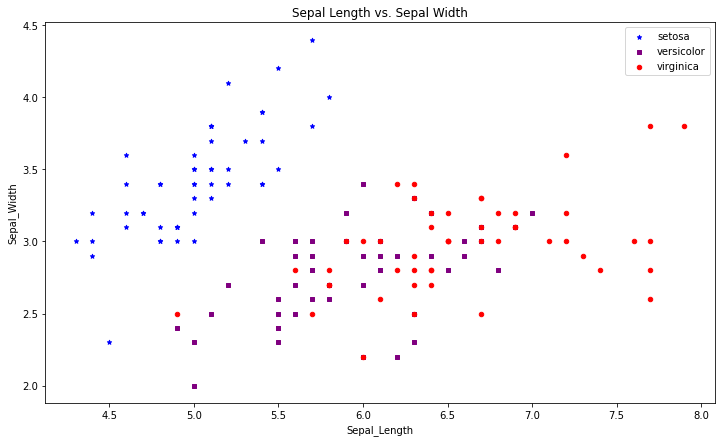

In [74]:
fig =  data[data.Species == 'Iris-setosa'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'blue', label = 'setosa', figsize = (12, 7), marker = '*')
data[data.Species == 'Iris-versicolor'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'purple', label = 'versicolor', ax = fig, marker = 's')
data[data.Species == 'Iris-virginica'].plot(kind = 'scatter', x = 'SepalLengthCm', y = 'SepalWidthCm', color = 'red', label = 'virginica', ax = fig)
fig.set_xlabel('Sepal_Length')
fig.set_ylabel('Sepal_Width')
fig.set_title('Sepal Length vs. Sepal Width')

In [75]:
# Attributes: Petal Length, Sepal Length, Sepal Width, Petal Width

In [76]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [77]:
# Target Variables are hier the 3 flower species

In [78]:
# lets importing all the necesarry packages for classification

In [79]:
from sklearn.linear_model import LogisticRegression
# for logistic Regression

from sklearn.model_selection import train_test_split
# to split the data set into training and testing

from sklearn.neighbors import KNeighborsClassifier
# for K nearest neighbours

from sklearn import svm
# for Support Vector Machine

from sklearn.tree import DecisionTreeClassifier 
# for using Decision Tree Algorithm

from sklearn import metrics 
# for checking the model accuracy

In [80]:
# lets drop the petal length and petal width
# befor do that, I will copy the dataset


In [81]:
data_copy = data.copy()

In [82]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [83]:
data.drop('PetalLengthCm', axis = 1, inplace = True)
data.drop('PetalWidthCm', axis = 1, inplace = True)

In [84]:
data.head()

,SepalLengthCm,SepalWidthCm,Species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


In [85]:
# Splitting Data into Training and Testing Dataset

In [86]:
train, test = train_test_split(data, test_size = 0.2)

In [87]:
print(train.shape)
print(test.shape)

(120, 3)
(30, 3)


In [88]:
# taking the training data features
train_X = train[['SepalLengthCm', 'SepalWidthCm']]

In [89]:
# output of our training data
train_y = train[['Species']]

In [90]:
# taking the tes data features
test_X = test[['SepalLengthCm', 'SepalWidthCm']]

In [91]:
# output of our test data
test_y = test[['Species']]

In [92]:
model = svm.SVC() 
# We have a algorithm selected

model.fit(train_X, train_y)
# We train the algorithm with the training data and the training output

C:\Users\90531\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [93]:
prediction = model.predict(test_X)
# Now we pass the testing data to the trained algorithm

In [94]:
print('The accuracy of th SVM is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of th SVM is:  0.8


In [95]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
# Lets scale the data
scaler = StandardScaler()

In [96]:
scaler = StandardScaler()
scaled_train_X = scaler.fit_transform(train_X)
scaled_test_X = scaler.fit_transform(test_X)

In [97]:
model_scaled = svm.SVC()
model_scaled.fit(scaled_train_X, train_y) #--> Why we don't scaled train_y ???

C:\Users\90531\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [98]:
scaled_prediction = model_scaled.predict(scaled_test_X)
print('The accuracy of the scaled SVM is: ', metrics.accuracy_score(scaled_prediction, test_y))

The accuracy of the scaled SVM is:  0.7666666666666667


In [99]:
# I don't have any differences between scaled and unscaled data !!!

In [100]:
# Now we try it on different SVM kernels

In [101]:
C = 5
alpha = 1 / (C * len(X))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=1000, tol=1e-3, random_state=42)

lin_clf.fit(scaled_train_X, train_y)
svm_clf.fit(scaled_train_X, train_y)
sgd_clf.fit(scaled_train_X, train_y)

C:\Users\90531\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90531\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\90531\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.002, eta0=0.001, learning_rate='constant',
              random_state=42)

In [102]:
print("LinearSVC:                   ", lin_clf.intercept_)
print("SVC:                         ", svm_clf.intercept_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_)

LinearSVC:                    [-1.97254206 -0.98774854 -0.54335955]
SVC:                          [-2.36103541 -0.93917289  0.48333978]
SGDClassifier(alpha=0.00200): [-0.659 -0.787 -0.526]
